In [ ]:
Написать функцию, реализующую алгоритм k-means. 
Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html.
Функция должна содержать не более двух циклов while (for).

5


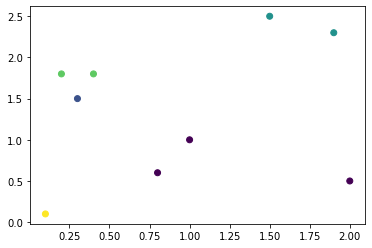

In [161]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1.9, 2.3],[1.5, 2.5],[0.8, 0.6],[0.4, 1.8],[0.1, 0.1],[0.2, 1.8],[2.0, 0.5],[0.3, 1.5],[1.0, 1.0]])

num_cluster = int(input())
def kmeans(obs, num_cluster, iterations = 3, thresh = 1e-05):
    DIM = 2
    N = obs.shape[0]

    x = obs
    y = np.zeros(N)
    k = np.arange(0, num_cluster, 1)
    s1 = 0
    s2 = 0
    t = 0
    

    while(s2 - s1 > thresh or t < iterations):
        if t == 0:
            index_ = np.random.choice(range(N), num_cluster, replace=False)
            mean = np.array(x[index_])
        else:
            mean = np.array(list(map(lambda m: np.mean(x[y==m], axis=0), k)))
        
        if (t != 0):
            u = list(map(lambda m: ((mean[m,0])**2 + (mean[m,1])**2)**(1/2), k))
            s1 = (np.sum(u))
        
        for i in range(N):
            dist = np.sum((mean - x[i])**2, axis=1)
            pred = np.argmin(dist)
            y[i] = pred
        
        u = list(map(lambda m: ((mean[m,0])**2 + (mean[m,1])**2)**(1/2), k))
        s2 = (np.sum(u))
        
        t = t + 1
    plt.scatter(x[:,0], x[:,1], c = y)
    plt.show()

kmeans(data, num_cluster)